<a href="https://colab.research.google.com/github/kivvgsr/data-science/blob/main/regression_tree_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
%pip install requests


In [16]:
import requests
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/real_estate_data.csv"
response = requests.get(URL)

if response.status_code == 200:
    # Read the response content and store it in a BytesIO object
    regression_tree_data = io.BytesIO(response.content)
    print("sucessful")
    # Now you can work with regression_tree_data
else:
    print("Failed to fetch data from the URL")


sucessful


In [4]:
%pip install js

In [17]:
# let import the libfaries
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

Imagine you are a data scientist working for a real estate company that is planning to invest in Boston real estate. You have collected information about various areas of Boston and are tasked with created a model that can predict the median price of houses for that area so it can be used to make offers.

The dataset had information on areas/towns not individual houses, the features are

CRIM: Crime per capita

ZN: Proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: Nitric oxides concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 1940

DIS: Weighted distances to ﬁve Boston employment centers

RAD: Index of accessibility to radial highways

TAX: Full-value property-tax rate per $10,000

PTRAIO: Pupil-teacher ratio by town

LSTAT: Percent lower status of the population

MEDV: Median value of owner-occupied homes in $1000s


# READ THE DATA

In [18]:
df = pd.read_csv(regression_tree_data)


In [19]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,NaN,36.2


# STEP -1 : LETS CHECK IS THERE ANY MISSING VALUES OR ANY NULL VALUES IF THERE THEN WE USE FILLNA METHOD TO FILL THE DATA.

In [21]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
LSTAT      20
MEDV        0
dtype: int64

from the above data we get that about in 6 columns there are 20 missing data is present .

# STEP - 2 : PRE PROCESS THE DATA :

In [22]:
#  lets drop the rows that contains the missing data ,
df.dropna(inplace=True)

In [23]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64


# Here our targrted value is MEDV

In [26]:
X = df.drop(columns=["MEDV"])
Y = df["MEDV"]

In [28]:
# here we created two data frame x,y .
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21


In [29]:
Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
5    28.7
Name: MEDV, dtype: float64

# STEP -3 : TESTING AND TRAINING THE DATA we are spliting

In [30]:
x_train,x_test,y_train,y_test =train_test_split(X,Y,test_size=0.2,random_state=1)


# STEP -4 : LETS CREATE THE REGRESSION TREE MODEL

Regression Trees are implemented using `DecisionTreeRegressor` from `sklearn.tree`

The important parameters of `DecisionTreeRegressor` are

`criterion`: {'squared_error', 'absolute_error', 'poisson', 'friedman_mse'} - The function used to measure error

`max_depth` - The max depth the tree can be

`min_samples_split` - The minimum number of samples required to split a node

`min_samples_leaf` - The minimum number of samples that a leaf can contain

`max_features`: {"auto", "sqrt", "log2"} - The number of feature we examine looking for the best one, used to speed up training


In [31]:
regression_tree = DecisionTreeRegressor(criterion = "squared_error")

## training the data

In [32]:
regression_tree.fit(x_train,y_train)

DecisionTreeRegressor()

## Evaluation

In [33]:
# evaluation can be donr by the finding the accquaracy we use the score.
regression_tree.score(x_train,y_train)

1.0

## lets predict.

In [37]:
prediction = regression_tree.predict(x_test)
prediction

array([23. , 24.1, 23.2, 13.4, 41.7, 45.4, 29.1, 18.6, 26.5, 20.7, 15.1,
       19.4, 11.8, 42.3, 14.9, 25.3, 20.1, 24.6, 15. , 29. , 29.6, 25. ,
       13.8, 22.5, 15. ,  7.4, 24.3,  5. , 28.7, 16.2, 14.1, 23.7, 30.8,
       23.7, 34.9, 18.8, 50. , 12.5, 33.4, 13.1, 30.3, 24.6, 13.4, 19.4,
       18.1, 50. , 18.8, 23.3, 24.3, 16.2, 21.4, 30.8, 30.1, 23.2, 15.1,
       29. , 10.8, 18.2, 13.5, 14.1,  8.8, 22.2, 34.9, 21.1, 32. , 23.3,
        5. , 18.2, 10.9, 14.4, 25. , 43.8, 15. , 23.9, 13.5, 12.1, 18.2,
       19.5, 20.4])

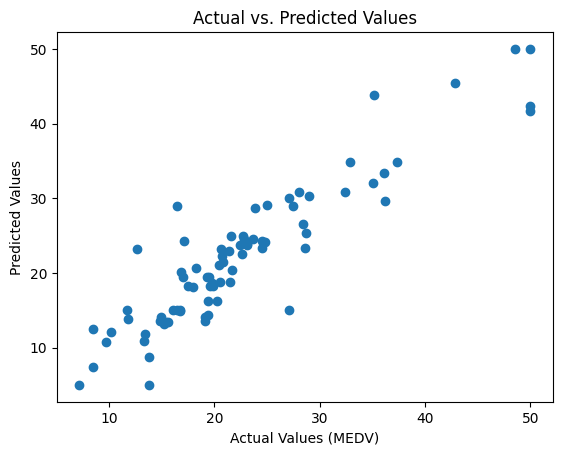

In [39]:
import matplotlib.pyplot as plt

plt.scatter(y_test, prediction)
plt.xlabel("Actual Values (MEDV)")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()


In [36]:
print("$",(prediction - y_test).abs().mean()*1000)

$ 2881.012658227849


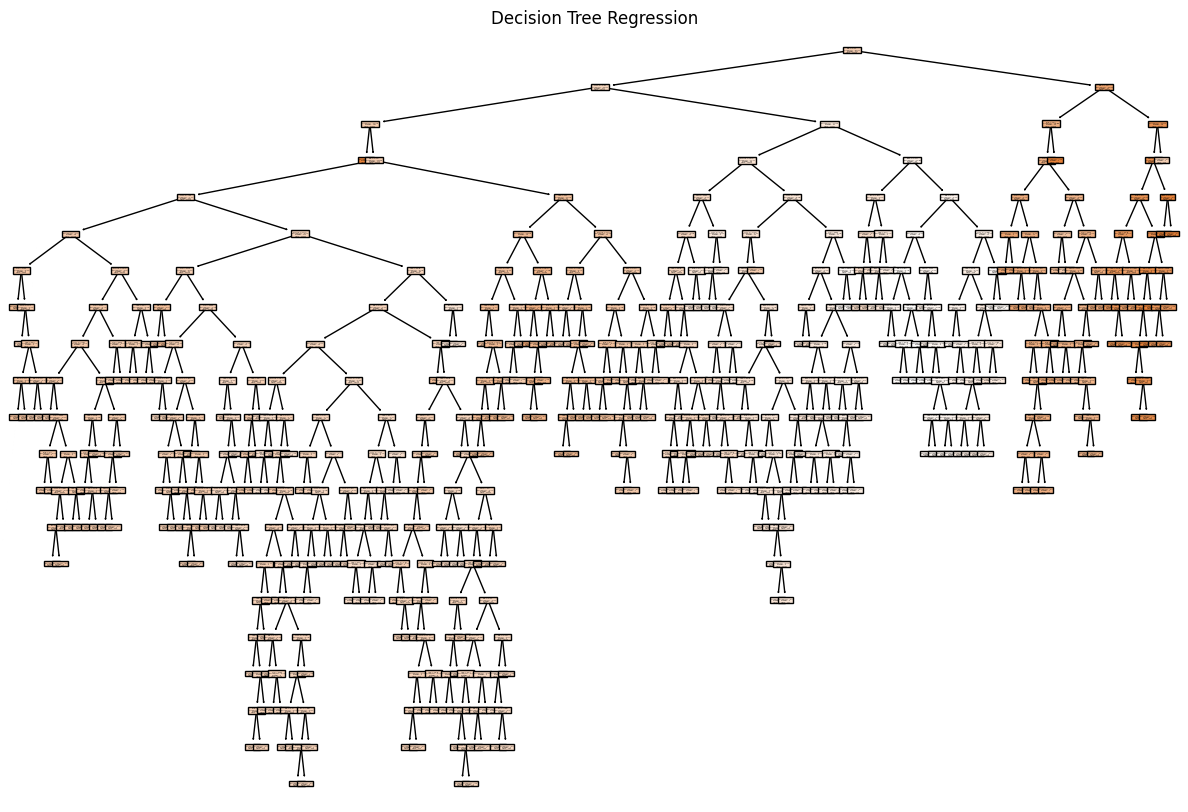

In [38]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(regression_tree, filled=True, feature_names=X.columns)
plt.title("Decision Tree Regression")
plt.show()
